<h1 style="text-align: center; color: #1f9d76"> Projeto Previsão do Preço da Casa (House Price Prediction)</h1>

<div class="alert alert-block alert-info"><font size="3">
    <b> Project Description:</font><font size="3"></b> O objetivo desse projeto é prever o preço da casa baseada nas suas características. Os dados utilizados para o desenvolvimento desse projeto é da plataforma Kaggle (plataforma de competição). 
    O projeto de <strong>Previsão do Preço da Casas</strong> tem como objetivo de prever o preço da casa baseada na suas características. </font> 
</div>

<font size="5"><a id="sumario"><bold>Summary</bold></a></font>
***
>1. [Introdução ao Modelo Linear](#ses1)
>2. [Importação das Bibliotecas](#ses2)
>3. [Carregando os Dados](#ses3)
>4. [Preparação dos Dados](#ses4)
>5. [Análise Exploratória](#ses5)
>6. [Engenharia de Dados](#ses6)
>7. [Engenharia de Dados](#ses7)
>8. [Engenharia de Dados](#ses8)
>9. [Referências](#ses9)

<h1 style="text-align:center;" ><a id="ses1">Introdução ao Modelo Linear</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Section Description</h3>

Nesta seção vou fazer uma breve introdução ao modelo de machine learning que vou utilizar para o desenvolvimento desse projeto.

### Introdução ao Modelo de Regressão Linear 

O Modelo de Regressão Linear é um algoritmo de machine learning baseado no aprendizado supervisionado, é um modelo simples e fornecem uma fórmula matemática fácil de interpretar. É um algoritmo usado para prever o valor de uma variável (variável dependente)  com base em outras variáveis (variáveis independentes). 

A regressão linear estima os coeficientes da equação linear, envolvendo uma ou mais variáveis independentes que melhor preveem o valor da variável dependente. A regressão linear se ajusta a uma linha reta ou superficial que minimiza as discrepâncias entre os valores de saída previstos e reais. Há calculadoras de regressão linear simples que usam um método dos mínimos quadrados para descobrir a linha de melhor ajuste para um conjunto de dados emparelhados. Em seguida, o valor de X (variável dependente) de Y (variável independente) é estimado. 

A regressão linear pode ser aplicada a diversas áreas de estudo empresarial e acadêmico. Como por exemplo; a regressão linear pode ser aplicada em finança para entender a relação entre o preço das ações de uma empresa e seus ganhos, ou para prever o valor futuro de uma moeda com base em seu desempenho passado.

<h1 style="text-align:center;" ><a id="ses2">Imports</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Section Description</h3> 

Importações das bibliotecas utilizadas para o desenvolvimento desse notebook e algumas configurações de saídas de códigos.

In [1]:
# Imports

import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import warnings

In [2]:
# Versão da Linguagem Python

from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
print("")

# Versões de pacotes utilizados 

%reload_ext watermark
%watermark -a "Ana-Data Scientist" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.8

Author: Ana-Data Scientist

pandas   : 1.5.2
missingno: 0.5.1
numpy    : 1.22.4



In [3]:
# Para ignorar mensagens de alertas 

warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

# Visualizar todas as colunas do dataset

pd.set_option('display.max_columns', None)

<h1 style="text-align:center;" ><a id="ses3">Carregamento dos dados</a></h1>

[VOLTAR](#sumario)

In [4]:
# Dataset de train
import os
os.chdir('C:\\Projetos\\House_Price_Predicition\\01-CodigoFonte\\00-DataSets')

train = pd.read_csv('train.csv')

# Dataset test

test = pd.read_csv('test.csv')

In [5]:
# Criando uma coluna para auxiliar na separação futura de treino e teste do modelo

train['train'] = 'Train'
test['test'] = 'Test'

In [6]:
# Meclando os dados em um só dataset

price_house_all = pd.concat([train, test])

In [7]:
# Visualizando as primeiras linhas 

price_house_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train,test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,Train,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,Train,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,Train,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,Train,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,Train,NaN


<h1 style="text-align:center;" ><a id="ses4">Preparação dos Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é fazer as transformações necessárias e limpeza dos dados que serão usados para treinar o modelo, como por exemplo:
* tratar valores ausentes
* remover dados  duplicados
* corrigir formatos incorretos

Entre outras tranformações e limpezas que podem ser realizadas e assim garantindo gerar resultados mais precisos. 

In [8]:
# Dimensão dos dados

print(f'''
Dataset de treino: {train.shape[0]} linhas e {train.shape[1]} colunas


Dataset de test: {test.shape[0]} linhas e {test.shape[1]} colunas''')


Dataset de treino: 1460 linhas e 82 colunas


Dataset de test: 1459 linhas e 81 colunas


In [9]:
# Tipos dos dados

price_house_all.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
SaleType          object
SaleCondition     object
SalePrice        float64
train             object
test              object
Length: 83, dtype: object

In [10]:
# Verificando se tem valores ausentes

price_house_all.isnull().sum().head(10)

Id                0
MSSubClass        0
MSZoning          4
LotFrontage     486
LotArea           0
Street            0
Alley          2721
LotShape          0
LandContour       0
Utilities         2
dtype: int64

<AxesSubplot: >

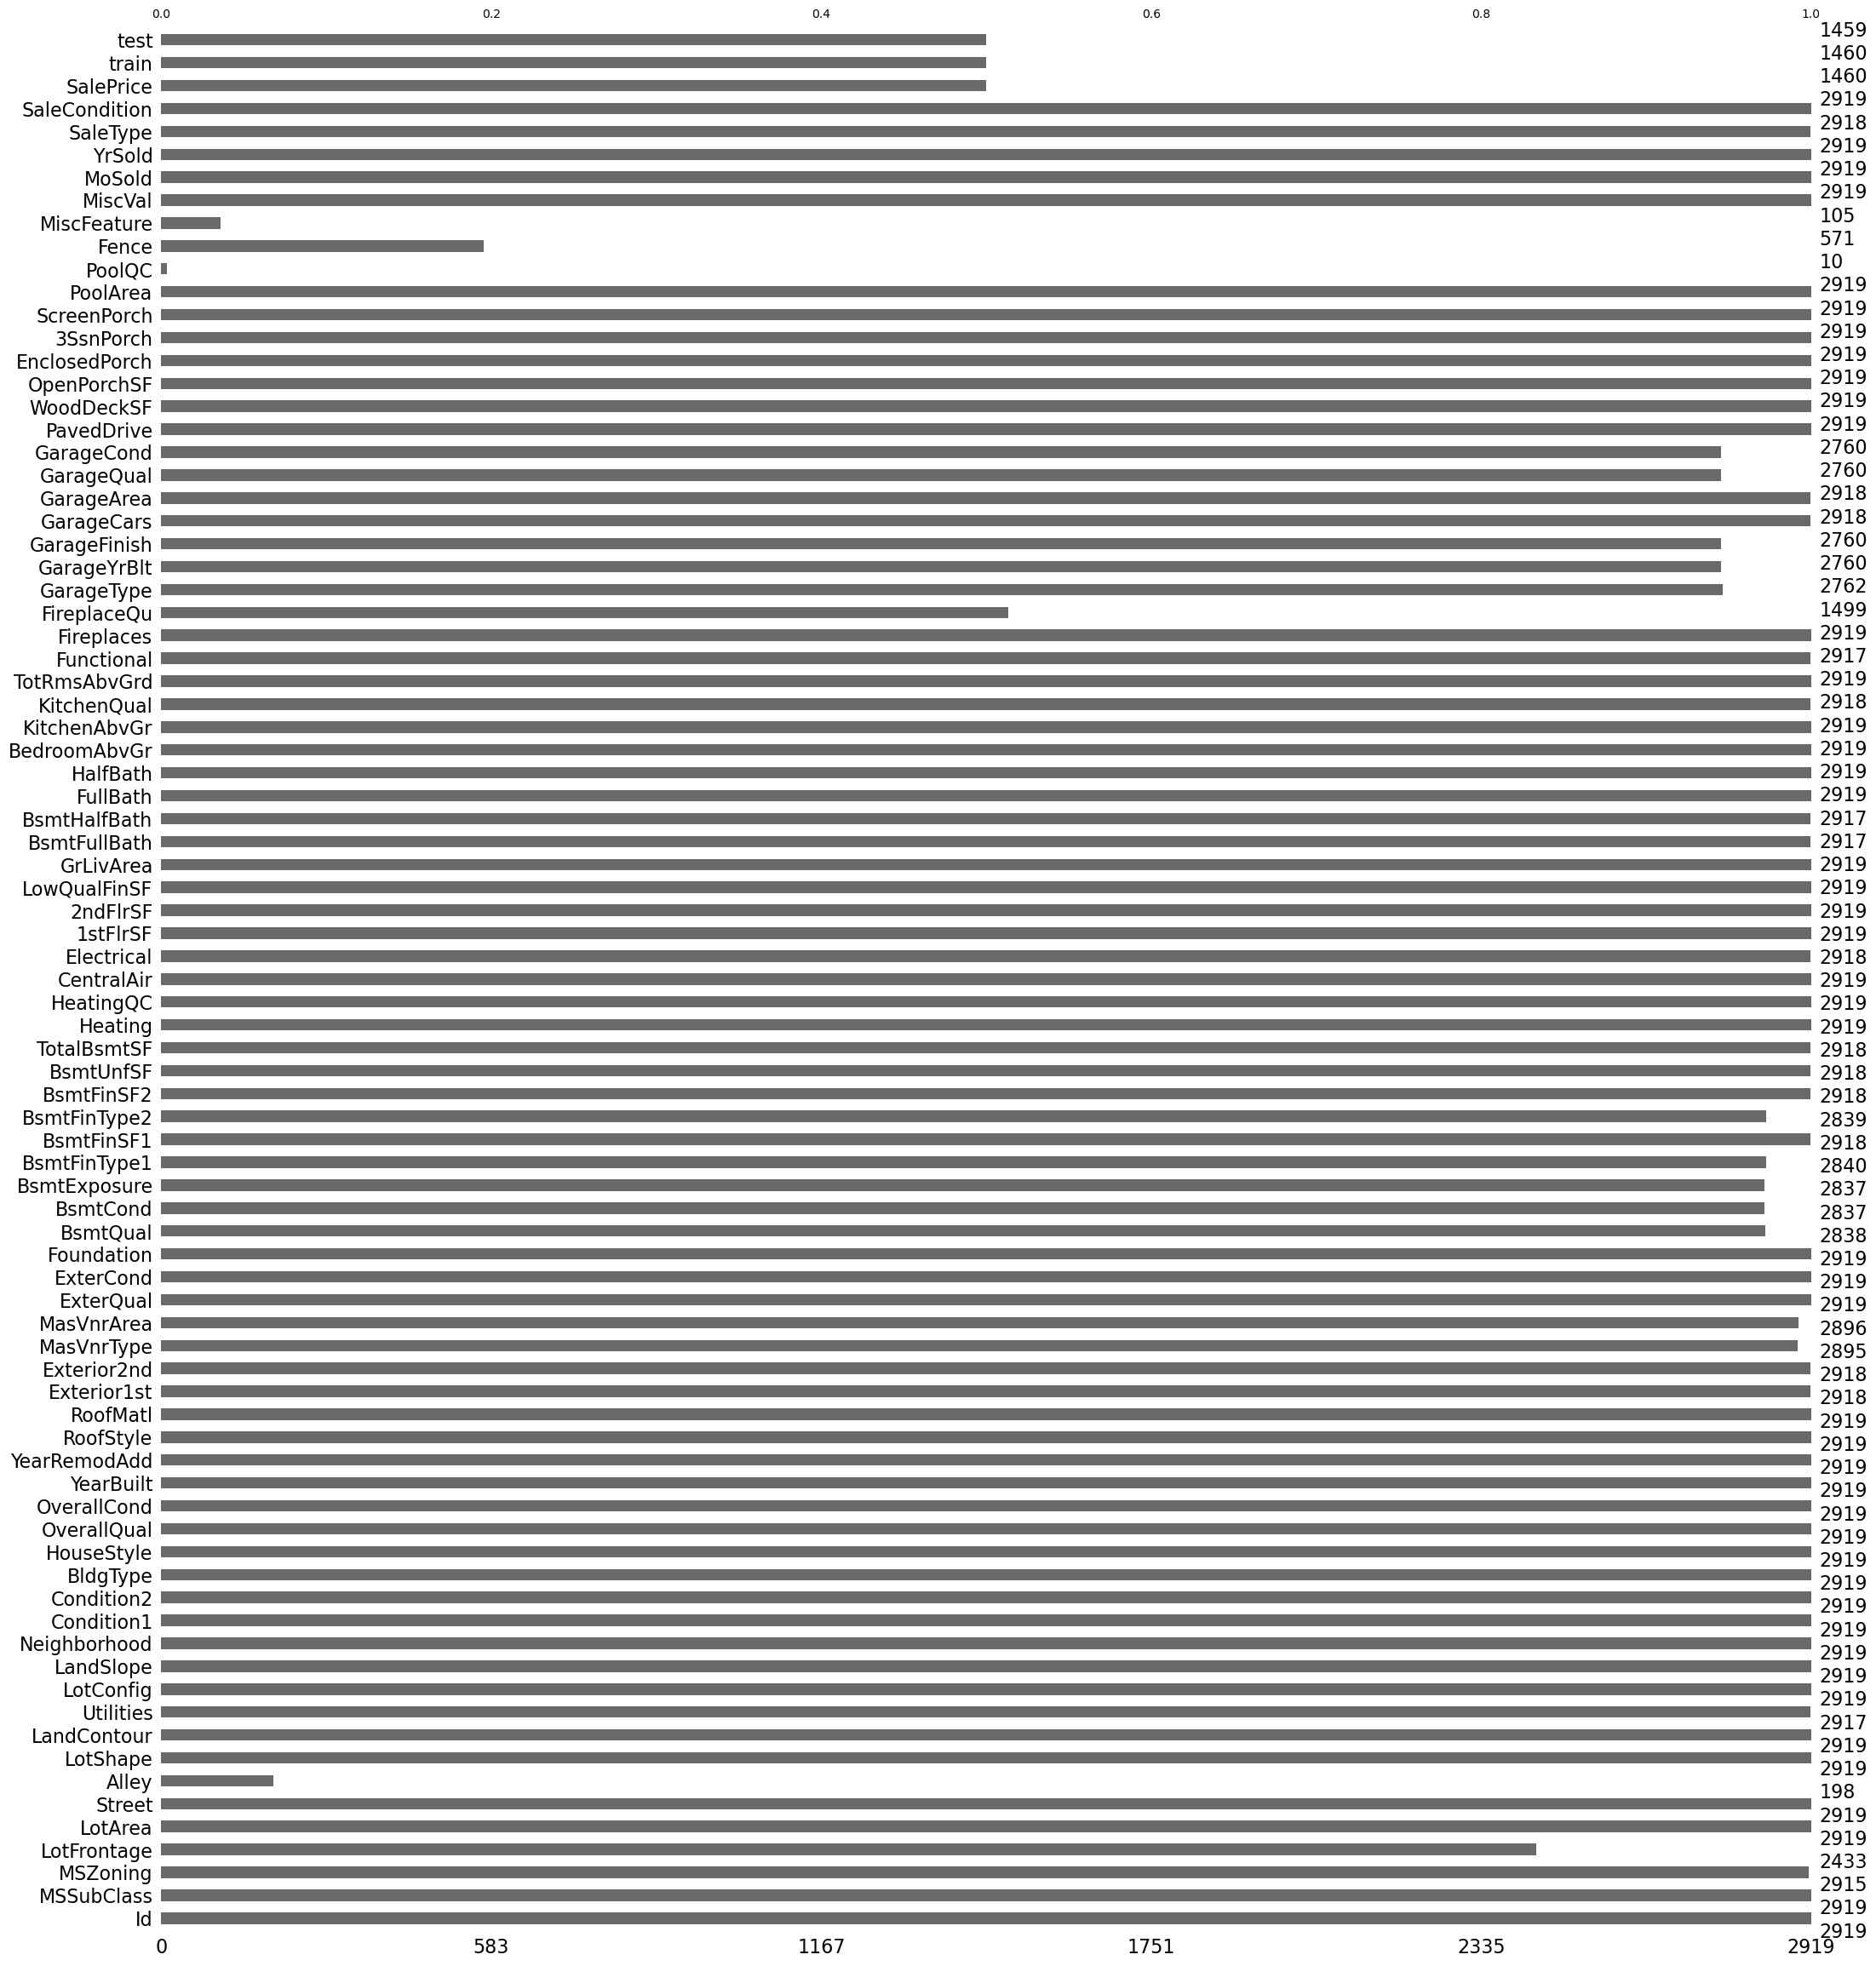

In [11]:
# Verificando se tem valores ausentes

msno.bar(price_house_all)

In [12]:
percent_missing = price_house_all.isnull().sum() * 100 / len(price_house_all)

missing_value_df = pd.DataFrame({'column_name': price_house_all.columns,
                                 'qtd_missing': price_house_all.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'column_type': price_house_all.dtypes})

missing_value_df[missing_value_df['percent_missing'] > 00.00]

,column_name,qtd_missing,percent_missing,column_type
MSZoning,MSZoning,4,0.137033,object
LotFrontage,LotFrontage,486,16.649538,float64
Alley,Alley,2721,93.216855,object
Utilities,Utilities,2,0.068517,object
Exterior1st,Exterior1st,1,0.034258,object
Exterior2nd,Exterior2nd,1,0.034258,object
MasVnrType,MasVnrType,24,0.822199,object
MasVnrArea,MasVnrArea,23,0.787941,float64
BsmtQual,BsmtQual,81,2.774923,object
BsmtCond,BsmtCond,82,2.809181,object


<h3 style="color: #cca002"><strong>Observações sobre os valores missing:</strong></h3>

Pelas analises acima, percebemos que tem algumas colunas com valores missing muito alto e outras com valores missing insignificante.

Para essas *variáveis categoricas* pode ser feito o tratamento dos valores missings substituindo os NaNs para sua devidas descrição  e para as *variáveis numéricas* pode ser feito a tratamento de de substituir ps NaN pelo valor mais frequente da coluna. 

Os tratamento só não vão ser aplicados nas colunas *SalePrice, train, test*, pois as colunas train e test foi criada para facilitar a separação depois e a coluna SalePrice tem valores missing devido a mesclagem dos datasets.

<span style="color: #cca002">**Obs:**</span> as descrição das colunas estão no arquivo [DictionaryData]() na pasta 02-Documentos_Referencias. 

In [13]:
# Fazendo os tratamentos dos valores missing das variáveis categoricas 

values = {'MasVnrType': 'None', 'BsmtQual':'No Basement', 'BsmtCond': 'No Basement', 'BsmtExposure': 'No Basement', 
          'BsmtFinType1': 'No Basement', 'BsmtFinType2': 'No Basement', 'FireplaceQu': 'No Fireplace', 
          'GarageType': 'No Garage',
          'GarageYrBlt': 0, 'GarageFinish': 'No Garage', 'GarageQual': 'No Garage', 'GarageCond': 'No Garage', 
          'Alley': 'Without Access', 'PoolQC': 'No Pool', 'Fence': 'No Fence', 'MiscFeature': 'No Features'}

price_house_all.fillna(value=values, inplace = True)

In [14]:
# Fazendo os tratamentos dos valores missing das variáveis numéricas

imputer_number = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

# removendo as colunas (SalePrice, train, test)
column_number = price_house_all.drop(columns=['SalePrice', 'train', 'test']
                                    ).select_dtypes(include=['int64', 'float64']).columns

price_house_all[column_number] = imputer_number.fit_transform(price_house_all[column_number])

In [15]:
# Verificando os valores missing após as tranformações

price_house_all[price_house_all.drop(columns=['SalePrice', 'train', 'test']).isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train,test
1379,1380.0,80.0,RL,73.0,9735.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5.0,5.0,2006.0,2007.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754.0,640.0,0.0,1394.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,0.0,No Fireplace,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,5.0,2008.0,WD,Normal,167500.0,Train,NaN
95,1556.0,50.0,RL,72.0,10632.0,Pave,Without Access,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5.0,3.0,1917.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725.0,499.0,0.0,1224.0,0.0,0.0,1.0,1.0,3.0,1.0,NaN,6.0,Mod,0.0,No Fireplace,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0.0,0.0,248.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2010.0,COD,Normal,NaN,NaN,Test
455,1916.0,30.0,NaN,109.0,21780.0,Grvl,Without Access,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2.0,4.0,1910.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,N,FuseA,810.0,0.0,0.0,810.0,0.0,0.0,1.0,0.0,1.0,1.0,TA,4.0,Min1,0.0,No Fireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119.0,24.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,3.0,2009.0,ConLD,Normal,NaN,NaN,Test
485,1946.0,20.0,RL,60.0,31220.0,Pave,Without Access,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6.0,2.0,1952.0,1952.0,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474.0,0.0,0.0,1474.0,0.0,0.0,1.0,0.0,3.0,1.0,TA,7.0,Min2,2.0,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0.0,0.0,144.0,0.0,0.0,0.0,No Pool,No Fence,Shed,750.0,5.0,2008.0,WD,Normal,NaN,NaN,Test
691,2152.0,30.0,RL,85.0,19550.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5.0,7.0,1940.0,2007.0,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518.0,0.0,0.0,1518.0,1.0,0.0,1.0,0.0,2.0,1.0,Fa,5.0,Typ,2.0,Gd,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage,Y,0.0,39.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2008.0,WD,Normal,NaN,NaN,Test
756,2217.0,20.0,NaN,80.0,14584.0,Pave,Without Access,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1.0,5.0,1952.0,1952.0,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,Wall,Po,N,FuseA,733.0,0.0,0.0,733.0,0.0,0.0,1.0,0.0,2.0,1.0,Fa,4.0,NaN,0.0,No Fireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,2.0,2008.0,WD,Abnorml,NaN,NaN,Test
790,2251.0,70.0,NaN,60.0,56600.0,Pave,Without Access,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5.0,1.0,1900.0,1950.0,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150.0,686.0,0.0,1836.0,0.0,0.0,2.0,0.0,4.0,1.0,TA,7.0,Maj1,0.0,No Fireplace,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2008.0,WD,Normal,NaN,NaN,Test
1013,247

As colunas que tinha valores missing  com um percentual abaixo de 0% e com quantidade menor que 5 NaNs  não foram consideradas para passar pelas transformações, as linhas com esses valores serão excluídas.

In [16]:
# Removendo as linhas que contém NaN

price_house_all[price_house_all.drop(columns=['SalePrice', 'train', 'test']).isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train,test
1379,1380.0,80.0,RL,73.0,9735.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5.0,5.0,2006.0,2007.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754.0,640.0,0.0,1394.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,0.0,No Fireplace,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,5.0,2008.0,WD,Normal,167500.0,Train,NaN
95,1556.0,50.0,RL,72.0,10632.0,Pave,Without Access,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5.0,3.0,1917.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725.0,499.0,0.0,1224.0,0.0,0.0,1.0,1.0,3.0,1.0,NaN,6.0,Mod,0.0,No Fireplace,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0.0,0.0,248.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2010.0,COD,Normal,NaN,NaN,Test
455,1916.0,30.0,NaN,109.0,21780.0,Grvl,Without Access,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2.0,4.0,1910.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,N,FuseA,810.0,0.0,0.0,810.0,0.0,0.0,1.0,0.0,1.0,1.0,TA,4.0,Min1,0.0,No Fireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119.0,24.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,3.0,2009.0,ConLD,Normal,NaN,NaN,Test
485,1946.0,20.0,RL,60.0,31220.0,Pave,Without Access,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6.0,2.0,1952.0,1952.0,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474.0,0.0,0.0,1474.0,0.0,0.0,1.0,0.0,3.0,1.0,TA,7.0,Min2,2.0,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0.0,0.0,144.0,0.0,0.0,0.0,No Pool,No Fence,Shed,750.0,5.0,2008.0,WD,Normal,NaN,NaN,Test
691,2152.0,30.0,RL,85.0,19550.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5.0,7.0,1940.0,2007.0,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518.0,0.0,0.0,1518.0,1.0,0.0,1.0,0.0,2.0,1.0,Fa,5.0,Typ,2.0,Gd,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage,Y,0.0,39.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2008.0,WD,Normal,NaN,NaN,Test
756,2217.0,20.0,NaN,80.0,14584.0,Pave,Without Access,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1.0,5.0,1952.0,1952.0,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,Wall,Po,N,FuseA,733.0,0.0,0.0,733.0,0.0,0.0,1.0,0.0,2.0,1.0,Fa,4.0,NaN,0.0,No Fireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,2.0,2008.0,WD,Abnorml,NaN,NaN,Test
790,2251.0,70.0,NaN,60.0,56600.0,Pave,Without Access,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5.0,1.0,1900.0,1950.0,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150.0,686.0,0.0,1836.0,0.0,0.0,2.0,0.0,4.0,1.0,TA,7.0,Maj1,0.0,No Fireplace,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2008.0,WD,Normal,NaN,NaN,Test
1013,247

In [17]:
# Selecionando as colunas nas quais contém NaNs 

price_house_all[price_house_all.drop(columns=['SalePrice', 'train', 'test']).isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train,test
1379,1380.0,80.0,RL,73.0,9735.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5.0,5.0,2006.0,2007.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754.0,640.0,0.0,1394.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,0.0,No Fireplace,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,5.0,2008.0,WD,Normal,167500.0,Train,NaN
95,1556.0,50.0,RL,72.0,10632.0,Pave,Without Access,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5.0,3.0,1917.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725.0,499.0,0.0,1224.0,0.0,0.0,1.0,1.0,3.0,1.0,NaN,6.0,Mod,0.0,No Fireplace,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0.0,0.0,248.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2010.0,COD,Normal,NaN,NaN,Test
455,1916.0,30.0,NaN,109.0,21780.0,Grvl,Without Access,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2.0,4.0,1910.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,N,FuseA,810.0,0.0,0.0,810.0,0.0,0.0,1.0,0.0,1.0,1.0,TA,4.0,Min1,0.0,No Fireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119.0,24.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,3.0,2009.0,ConLD,Normal,NaN,NaN,Test
485,1946.0,20.0,RL,60.0,31220.0,Pave,Without Access,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6.0,2.0,1952.0,1952.0,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474.0,0.0,0.0,1474.0,0.0,0.0,1.0,0.0,3.0,1.0,TA,7.0,Min2,2.0,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0.0,0.0,144.0,0.0,0.0,0.0,No Pool,No Fence,Shed,750.0,5.0,2008.0,WD,Normal,NaN,NaN,Test
691,2152.0,30.0,RL,85.0,19550.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5.0,7.0,1940.0,2007.0,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518.0,0.0,0.0,1518.0,1.0,0.0,1.0,0.0,2.0,1.0,Fa,5.0,Typ,2.0,Gd,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage,Y,0.0,39.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2008.0,WD,Normal,NaN,NaN,Test
756,2217.0,20.0,NaN,80.0,14584.0,Pave,Without Access,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1.0,5.0,1952.0,1952.0,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,Wall,Po,N,FuseA,733.0,0.0,0.0,733.0,0.0,0.0,1.0,0.0,2.0,1.0,Fa,4.0,NaN,0.0,No Fireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,2.0,2008.0,WD,Abnorml,NaN,NaN,Test
790,2251.0,70.0,NaN,60.0,56600.0,Pave,Without Access,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5.0,1.0,1900.0,1950.0,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150.0,686.0,0.0,1836.0,0.0,0.0,2.0,0.0,4.0,1.0,TA,7.0,Maj1,0.0,No Fireplace,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,1.0,2008.0,WD,Normal,NaN,NaN,Test
1013,247

In [18]:
# Selecioando as colunasque contém missing

price_house_all.loc[:, price_house_all.isnull().any()]

,MSZoning,Utilities,Exterior1st,Exterior2nd,Electrical,KitchenQual,Functional,SaleType,SalePrice,train,test
0,RL,AllPub,VinylSd,VinylSd,SBrkr,Gd,Typ,WD,208500.0,Train,NaN
1,RL,AllPub,MetalSd,MetalSd,SBrkr,TA,Typ,WD,181500.0,Train,NaN
2,RL,AllPub,VinylSd,VinylSd,SBrkr,Gd,Typ,WD,223500.0,Train,NaN
3,RL,AllPub,Wd Sdng,Wd Shng,SBrkr,Gd,Typ,WD,140000.0,Train,NaN
4,RL,AllPub,VinylSd,VinylSd,SBrkr,Gd,Typ,WD,250000.0,Train,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,AllPub,CemntBd,CmentBd,SBrkr,TA,Typ,WD,NaN,NaN,Test
1455,RM,AllPub,CemntBd,CmentBd,SBrkr,TA,Typ,WD,NaN,NaN,Test
1456,RL,AllPub,VinylSd,VinylSd,SBrkr,TA,Typ,WD,NaN,NaN,Test
1457,RL,AllPub,HdBoard,Wd Shng,SBrkr,TA,Typ,WD,NaN,NaN,Test


In [19]:
# Removendo os valores missing das colunas desejadas

price_house_all.dropna(subset=['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 
                                'Electrical','KitchenQual', 'Functional', 'SaleType'], inplace = True)

<h1 style="text-align:center;" ><a id="ses5">Análise Exploratória de Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é para analisar e investigar conjuntos de dados, resumir suas principais características e também usar métados visuais para analisar. Essa etapa permite descobrir padrões, detectar anomalias, testar uma hipótese ou verificar suposições. 

<span style="color: #cca002">**Obs:**</span> Para a análise exploratória vamos usar os dados de **train**, pois é o dataset que possui os preços das casa.

In [260]:
# Selecionando os dados de train

price_house_analycis = price_house_all[price_house_all['train'] == 'Train'].drop(columns=['train', 'test'])

In [253]:
price_house_all['train']

0       Train
1       Train
2       Train
3       Train
4       Train
        ...  
1454      NaN
1455      NaN
1456      NaN
1457      NaN
1458      NaN
Name: train, Length: 2909, dtype: object

In [243]:
# Estatística básica das variáveis numericas

price_house_all.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2909.0,1457.701272,842.944744,1.0,728.0,1456.0,2187.0,2919.0
MSSubClass,2909.0,57.200069,42.559205,20.0,20.0,50.0,70.0,190.0
LotFrontage,2909.0,67.711241,21.582249,21.0,60.0,63.0,78.0,313.0
LotArea,2909.0,10127.632864,7828.308906,1300.0,7450.0,9434.0,11526.0,215245.0
OverallQual,2909.0,6.096597,1.402721,1.0,5.0,6.0,7.0,10.0
OverallCond,2909.0,5.570987,1.103731,1.0,5.0,5.0,6.0,9.0
YearBuilt,2909.0,1971.421794,30.235012,1872.0,1954.0,1973.0,2001.0,2010.0
YearRemodAdd,2909.0,1984.324854,20.855203,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2909.0,101.627707,179.018192,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2909.0,442.367824,455.643320,0.0,0.0,370.0,734.0,5644.0


In [248]:
# Estatística básica das variáveis categoricas

price_house_all.describe(include=['object']).T

,count,unique,top,freq
MSZoning,2909,5,RL,2260
Street,2909,2,Pave,2898
Alley,2909,3,Without Access,2712
LotShape,2909,4,Reg,1852
LandContour,2909,4,Lvl,2615
Utilities,2909,2,AllPub,2908
LotConfig,2909,5,Inside,2126
LandSlope,2909,3,Gtl,2769
Neighborhood,2909,25,NAmes,443
Condition1,2909,9,Norm,2505


In [249]:
price_house_all[['SalePrice', 'Neighborhood']]

,SalePrice,Neighborhood
0,208500.0,CollgCr
1,181500.0,Veenker
2,223500.0,CollgCr
3,140000.0,Crawfor
4,250000.0,NoRidge
...,...,...
1454,NaN,MeadowV
1455,NaN,MeadowV
1456,NaN,Mitchel
1457,NaN,Mitchel


In [33]:
# Estatística descritiva 

faixa de preço 
Preço x Localidade (Neighborhood)

SaleCondition: Condição de venda x SaleType: Tipo de venda
preco x algumas caracteristica da casa(quartos, banheiros...)
preco x nota de avaliação, se tiver
preco de casa ao decorrer dos anos
frequencia de dados cat e numero em relação ao preco

No     1928946
Yes        989
Name: potential_issue, dtype: int64

In [35]:
dataset_product['deck_risk']

0          No
1          No
2         Yes
3          No
4         Yes
         ... 
242070    Yes
242071    Yes
242072    Yes
242073    Yes
242074    Yes
Name: deck_risk, Length: 1929935, dtype: object

In [34]:
dataset_product['deck_risk']
# produtos com sinais de risco - deck_risk , oe_constraint, ppap_risk. stop_auto_buy, rev_stop
# quantidade de vendas nos períodos anteriores e para os proximos 
# produtos atarsado x tempo em transito -  peças_past_due x in_transit_qty
# media de tempo do produto em transito x produtos
# Barplots de características categóricas:
# boxplot de interiros e string

0          No
1          No
2         Yes
3          No
4         Yes
         ... 
242070    Yes
242071    Yes
242072    Yes
242073    Yes
242074    Yes
Name: deck_risk, Length: 1929935, dtype: object

No     1928946
Yes        989
Name: potential_issue, dtype: int64

limpeza
https://aws.amazon.com/pt/what-is/data-cleansing/


analise
https://www.ibm.com/br-pt/cloud/learn/exploratory-data-analysis#:~:text=O%20que%20%C3%A9%20a%20an%C3%A1lise%20explorat%C3%B3ria%20de%20dados%3F,muitas%20vezes%20usando%20m%C3%A9todos%20de%20visualiza%C3%A7%C3%A3o%20de%20dados



<div class="alert alert-block alert-success">
<b>Section Description: </b> Descrição da sub sessão nos mesmo moldes da sessão.
</div>

<div class="alert alert-warning">
<b>Insights/Results: </b> Descrição dos insights e/ou resultados alcançados pela Sessão. Podem haver 1 ou mais linhas com estes resultados em uma única sessão. 
</div>

<div class="alert alert-block alert-danger">
<b>Errors/ToDo: </b> Descrição de erros e ou tarefas que precisam ser resolvidos ou tratadas para cada linha de execução que necessitar dessa informação.
</div>